<a href="https://colab.research.google.com/github/vaibhaviitkgp/Bioinformatics_Project/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


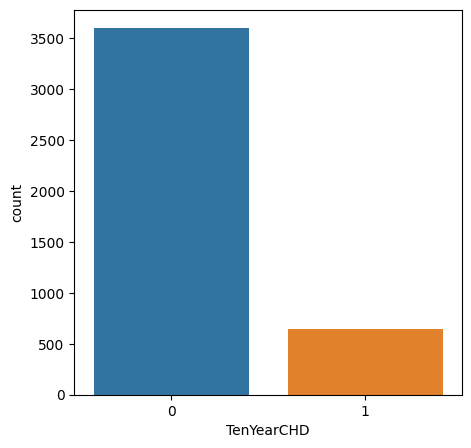

In [6]:
plt.figure(figsize = (5,5))
sns.countplot(x='TenYearCHD', data = df)
plt.show()

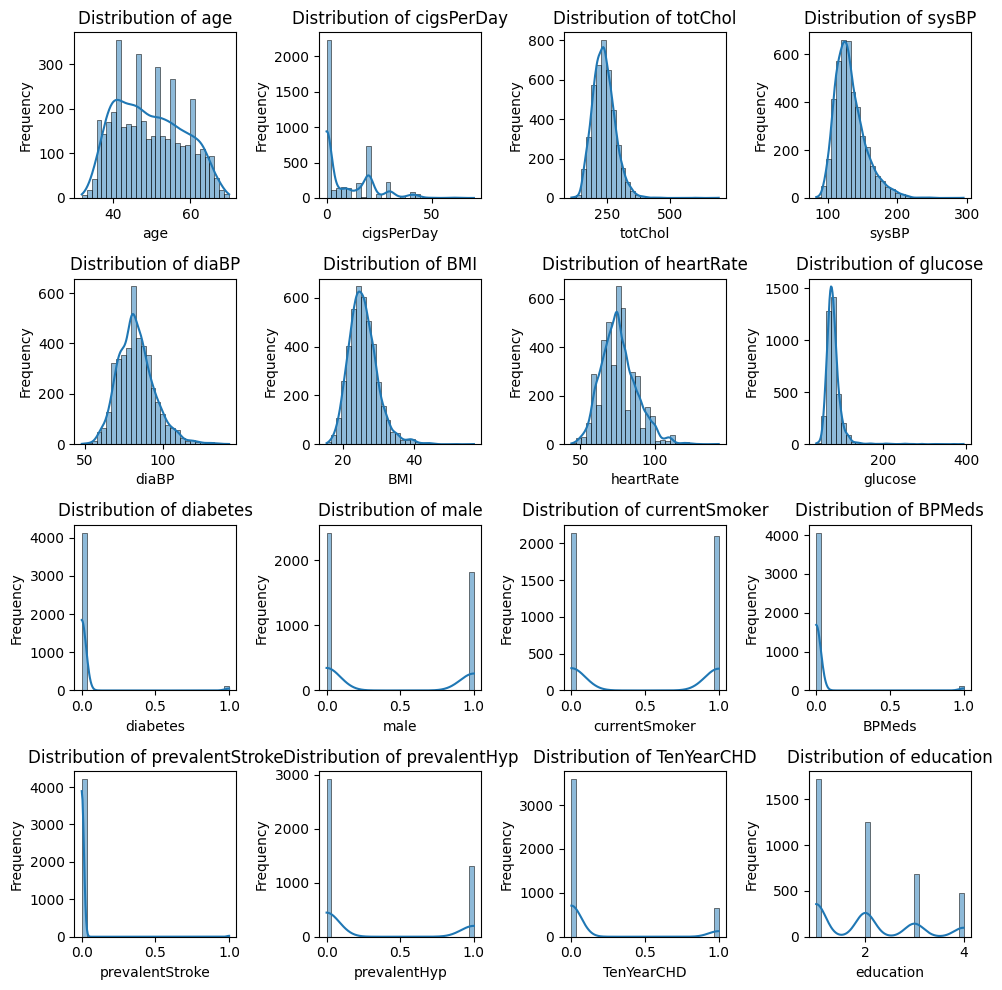

In [7]:
plt.figure(figsize = (10,10))

variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','diabetes', 'male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','TenYearCHD','education']

for i, col in enumerate(variables, 1):
  plt.subplot(4,4,i)
  sns.histplot(df[col], kde= True, bins = 30)
  plt.title(f'Distribution of {col}' )
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

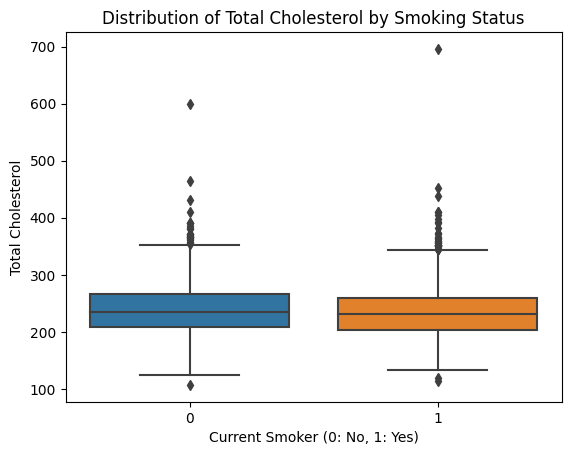

In [8]:
sns.boxplot(x='currentSmoker', y='totChol', data=df)
plt.title('Distribution of Total Cholesterol by Smoking Status')
plt.xlabel('Current Smoker (0: No, 1: Yes)')
plt.ylabel('Total Cholesterol')
plt.show()

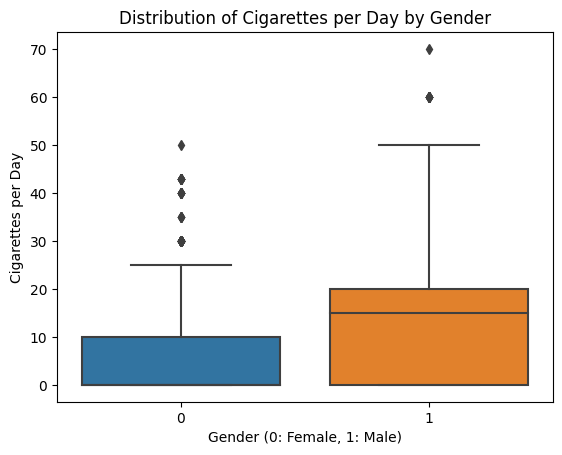

In [9]:
sns.boxplot(x='male', y='cigsPerDay', data=df)
plt.title('Distribution of Cigarettes per Day by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Cigarettes per Day')
plt.show()

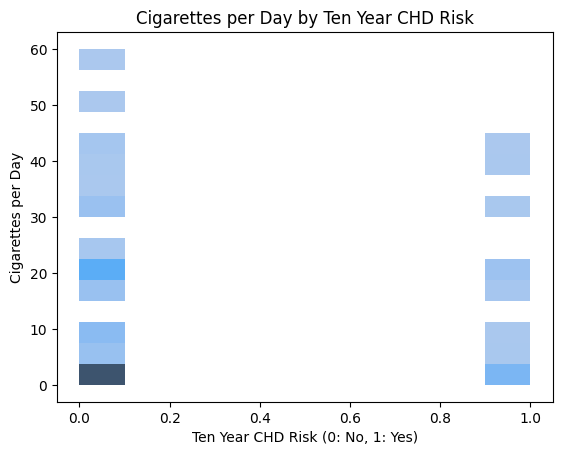

In [10]:
sns.histplot(x='TenYearCHD', y='cigsPerDay', data=df.sample(500, random_state=42))
plt.title('Cigarettes per Day by Ten Year CHD Risk')
plt.xlabel('Ten Year CHD Risk (0: No, 1: Yes)')
plt.ylabel('Cigarettes per Day')
plt.show()

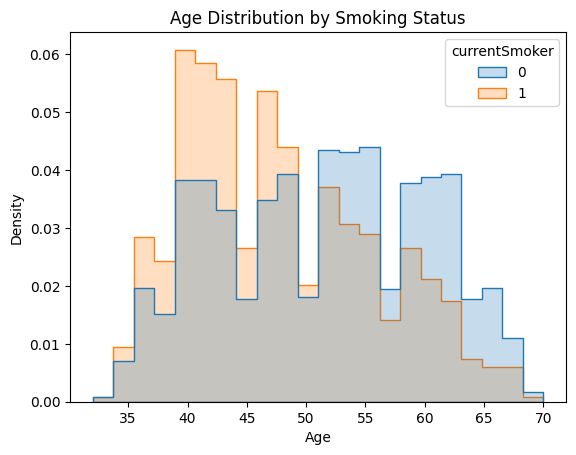

In [11]:
sns.histplot(df, x='age', hue='currentSmoker', element="step", stat="density", common_norm=False)
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

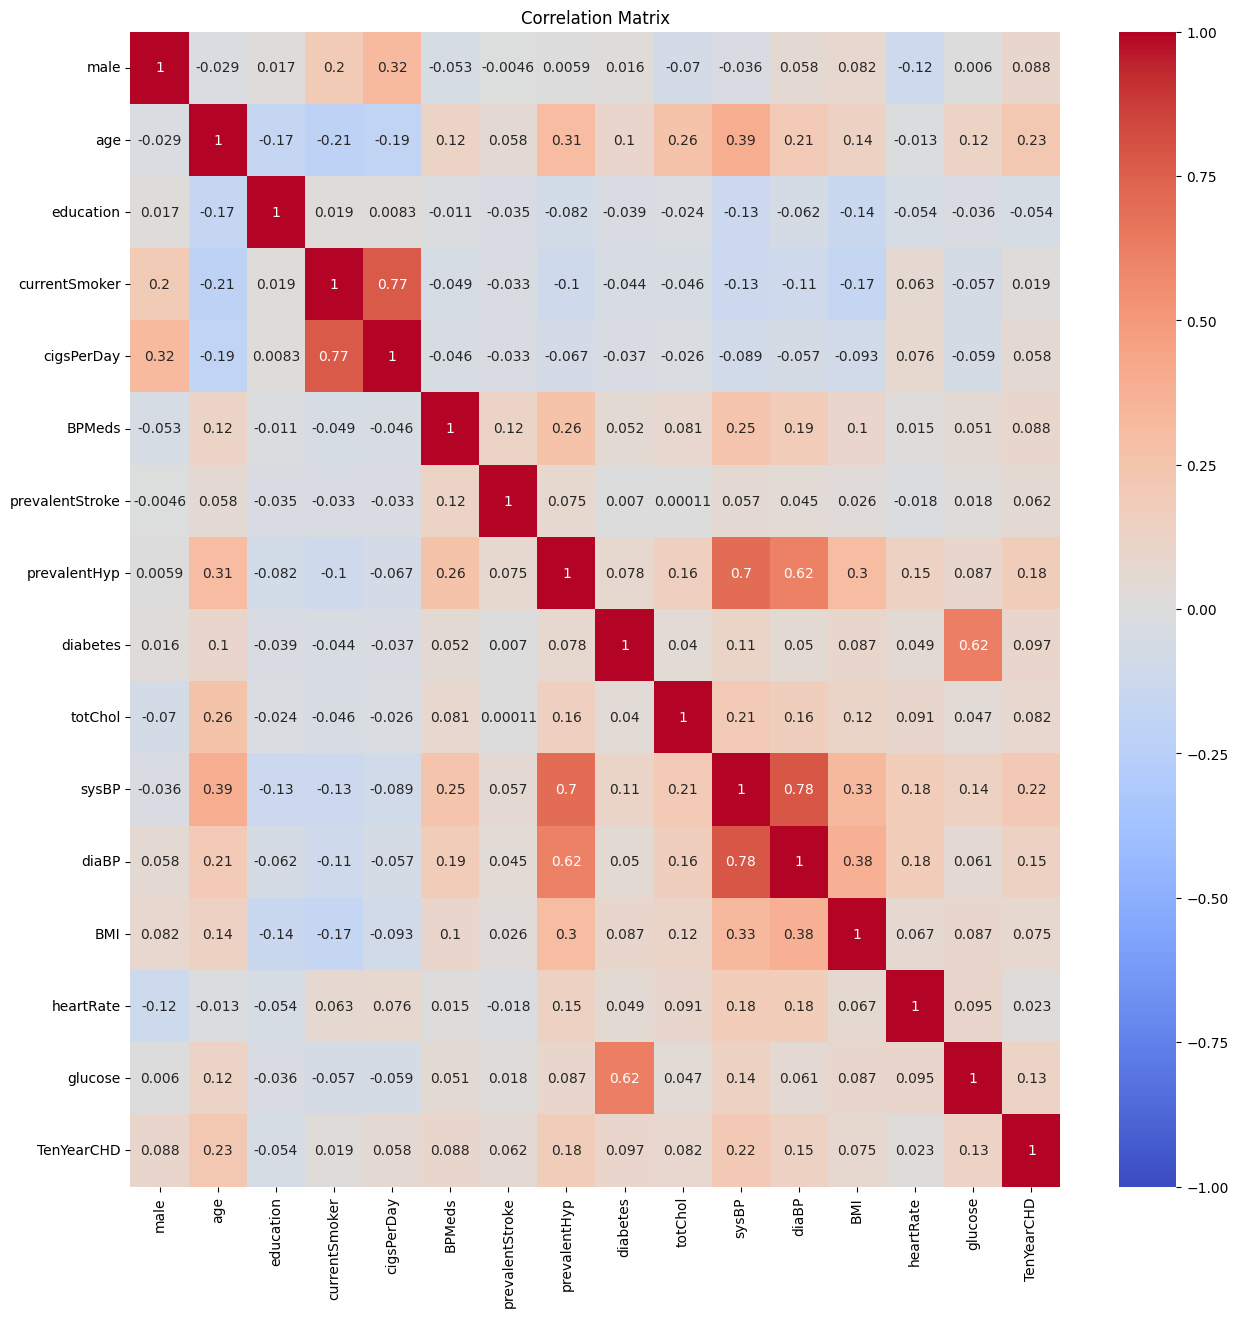

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [33]:
df['BMI'].dtype

dtype('float64')

In [14]:
df['BMI'] = pd.to_numeric(df['BMI'],errors='coerce')

In [15]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
df = df.drop(columns = ['education'], axis = 1)

In [18]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X = df.drop('TenYearCHD', axis = 1)
Y = df['TenYearCHD']
X_norm = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_norm, columns=X.columns)


In [21]:
covariance_matrix = np.cov(scaled_df, rowvar = False)
covariance_matrix

array([[ 1.00024667, -0.02301615,  0.19840057,  0.32164272, -0.05240945,
        -0.00190047,  0.00808358,  0.01702327, -0.06760305, -0.03213874,
         0.05964803,  0.07965489, -0.11699963,  0.00520807],
       [-0.02301615,  1.00024667, -0.21036884, -0.18972418,  0.12622886,
         0.05521076,  0.30710723,  0.10222402,  0.26491544,  0.39366691,
         0.21053369,  0.13527372, -0.01011948,  0.11530631],
       [ 0.19840057, -0.21036884,  1.00024667,  0.77062423, -0.04802212,
        -0.03096308, -0.10370331, -0.03805381, -0.04758137, -0.12762866,
        -0.10751809, -0.16444381,  0.05725607, -0.0520983 ],
       [ 0.32164272, -0.18972418,  0.77062423,  1.00024667, -0.04624779,
        -0.03184315, -0.06737816, -0.03331962, -0.02541438, -0.08810603,
        -0.05401997, -0.08777813,  0.07051677, -0.05226064],
       [-0.05240945,  0.12622886, -0.04802212, -0.04624779,  1.00024667,
         0.11876862,  0.26157036,  0.0449075 ,  0.08396141,  0.25663636,
         0.19561958,  0.10

In [22]:
eigenvalue, eigenvector = np.linalg.eigh(covariance_matrix)
index = np.argsort(eigenvalue)[::-1]
eigenvalue = eigenvalue[index]
eigenvector = eigenvector[:, index]
eigenvalue, eigenvector

(array([3.17684451, 1.88479596, 1.5594914 , 1.12723073, 1.06255731,
        1.03426819, 0.87807742, 0.80240265, 0.68927311, 0.62138603,
        0.39467518, 0.3813439 , 0.21578753, 0.17531946]),
 array([[-0.04509361,  0.35640631,  0.04417295,  0.55501202, -0.28135219,
         -0.06949297,  0.13536785,  0.01660548, -0.57756264, -0.32160707,
          0.01560602,  0.0243862 , -0.11785806,  0.08139122],
        [ 0.29478682, -0.10432234,  0.02118886,  0.11052494,  0.0555151 ,
         -0.53910479,  0.02033007, -0.36099171, -0.29752782,  0.58226507,
         -0.0242993 , -0.09848304, -0.01024044, -0.16479979],
        [-0.19664342,  0.59139472,  0.04805462, -0.11548178,  0.1497557 ,
         -0.09673548, -0.0691548 , -0.04513753,  0.22304352,  0.20034848,
         -0.02662637, -0.00373464, -0.68303533,  0.01363658],
        [-0.16676882,  0.63375639,  0.04117595, -0.03680007,  0.07270901,
         -0.10207756, -0.00882222,  0.00761598,  0.10563837,  0.15644533,
         -0.00660039, -0.014

In [23]:
norm_eigenvec = eigenvector / np.linalg.norm(eigenvector)
norm_eigenvec

array([[-0.01205177,  0.09525359,  0.01180572,  0.1483332 , -0.07519454,
        -0.01857278,  0.03617858,  0.004438  , -0.15436011, -0.0859531 ,
         0.00417088,  0.00651749, -0.03149889,  0.02175272],
       [ 0.07878509, -0.02788132,  0.00566296,  0.02953903,  0.01483704,
        -0.14408182,  0.00543344, -0.09647909, -0.07951765,  0.15561689,
        -0.00649426, -0.0263207 , -0.00273687, -0.0440446 ],
       [-0.05255516,  0.15805689,  0.01284314, -0.03086381,  0.0400239 ,
        -0.02585365, -0.0184824 , -0.01206351,  0.05961089,  0.05354538,
        -0.0071162 , -0.00099813, -0.18254887,  0.00364453],
       [-0.04457084,  0.16937852,  0.01100474, -0.00983523,  0.0194323 ,
        -0.02728137, -0.00235784,  0.00203546,  0.02823304,  0.04181177,
        -0.00176403, -0.00399175,  0.19145406, -0.01358195],
       [ 0.05539159,  0.01053843, -0.01351033,  0.02836816,  0.14511645,
         0.01370448, -0.15220437,  0.12598222, -0.08047444,  0.00451155,
        -0.00821882, -0.01

In [24]:
pca = np.dot(scaled_df, norm_eigenvec)
pc_df = pd.DataFrame(pca, columns = [f'PC{i+1}' for i in range(pca.shape[1])])
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.426948,-0.259601,0.015895,0.181931,-0.189350,0.326632,0.112046,0.209195,-0.322913,-0.114761,0.069957,0.102649,-0.000670,0.045739
1,-0.002302,-0.339253,-0.053712,-0.385051,-0.072030,0.169435,0.244426,0.264323,-0.146677,0.052413,0.012472,-0.065652,0.038204,-0.032154
2,-0.295031,0.378573,-0.050653,0.105443,-0.051598,-0.138997,0.064149,0.050170,-0.093498,-0.028407,0.012420,-0.107486,-0.045257,0.051331
3,0.411574,0.454311,0.045344,0.068151,0.012392,-0.137364,-0.143905,-0.243766,0.413964,0.393749,-0.152685,0.175752,0.174467,-0.158808
4,-0.187076,0.284041,0.045723,-0.442282,0.158973,-0.185999,0.067419,0.053836,0.146830,-0.070969,-0.112967,-0.104215,0.062714,-0.028864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,-0.540662,0.638373,-0.038029,0.233793,0.088660,-0.200794,-0.171361,-0.302005,-0.029062,0.008765,0.004995,-0.158619,0.347311,-0.019530
4051,-0.330856,0.165651,0.021395,-0.392332,0.189415,0.162755,-0.112237,-0.255335,0.042722,-0.085175,-0.101680,-0.163160,-0.052326,-0.098620
4052,0.044138,-0.403046,0.176323,-0.262231,0.082491,-0.150009,0.014276,-0.112229,-0.039681,-0.175621,-0.271651,-0.040665,0.071663,-0.014792
4053,0.237773,-0.033977,-0.233117,0.376731,-0.267291,0.440575,-0.129916,-0.168237,0.009387,-0.363033,0.118557,0.122544,-0.000099,-0.097317


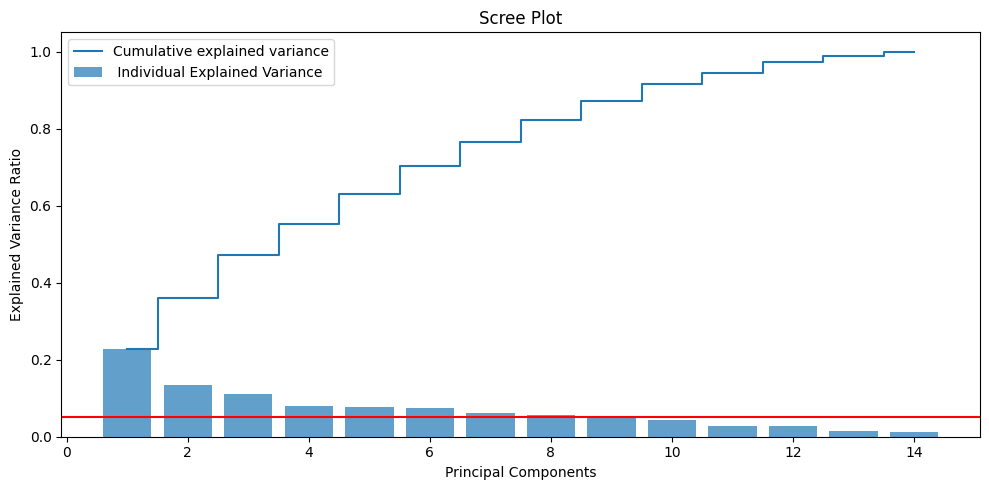

In [25]:
ex_var_ratio = eigenvalue/eigenvalue.sum()

plt.figure(figsize=(10,5))
plt.bar(range(1, len(ex_var_ratio) + 1), ex_var_ratio, alpha = 0.7, align = 'center', label = ' Individual Explained Variance')
plt.step(range(1, len(ex_var_ratio) + 1), np.cumsum(ex_var_ratio), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [48]:
pca_9 = pc_df.iloc[:,0:9]
pca_9

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.426948,-0.259601,0.015895,0.181931,-0.189350,0.326632,0.112046,0.209195,-0.322913
1,-0.002302,-0.339253,-0.053712,-0.385051,-0.072030,0.169435,0.244426,0.264323,-0.146677
2,-0.295031,0.378573,-0.050653,0.105443,-0.051598,-0.138997,0.064149,0.050170,-0.093498
3,0.411574,0.454311,0.045344,0.068151,0.012392,-0.137364,-0.143905,-0.243766,0.413964
4,-0.187076,0.284041,0.045723,-0.442282,0.158973,-0.185999,0.067419,0.053836,0.146830
...,...,...,...,...,...,...,...,...,...
4050,-0.540662,0.638373,-0.038029,0.233793,0.088660,-0.200794,-0.171361,-0.302005,-0.029062
4051,-0.330856,0.165651,0.021395,-0.392332,0.189415,0.162755,-0.112237,-0.255335,0.042722
4052,0.044138,-0.403046,0.176323,-0.262231,0.082491,-0.150009,0.014276,-0.112229,-0.039681
4053,0.237773,-0.033977,-0.233117,0.376731,-0.267291,0.440575,-0.129916,-0.168237,0.009387


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_9, Y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3244, 9), (811, 9), (3244,), (811,))

In [50]:
dist = y_train.value_counts()
dist

0    2742
1     502
Name: TenYearCHD, dtype: int64

In [51]:
! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [52]:
sm = SMOTE(random_state= 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)
print(pd.Series(y_train_smote).value_counts())

0    2742
1    2742
Name: TenYearCHD, dtype: int64


In [74]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [93]:
classifiers = [
    LogisticRegression(max_iter= 9999, random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors= 3)
]

In [98]:
for model in classifiers:
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

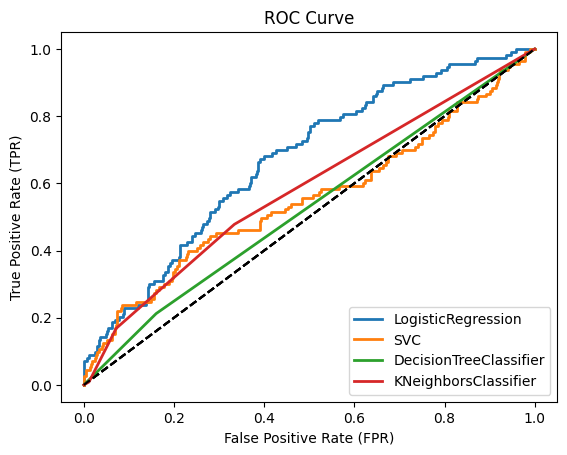

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(y_true, y_prob, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')


for model in classifiers:
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)


    if hasattr(model, "decision_function"):
        y_prob = pipeline.decision_function(X_test)
    else:
        y_prob = pipeline.predict_proba(X_test)[:, 1]

    plot_roc_curve(y_test, y_prob, label=model.__class__.__name__)


plt.legend(loc='lower right')
plt.show()


In [100]:
from sklearn.metrics import classification_report


for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    report = classification_report(y_test, y_pred)


    print(f"Classification Report for {model.__class__.__name__}:\n")
    print(report)
    print('-'*80)


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       698
           1       0.67      0.07      0.13       113

    accuracy                           0.87       811
   macro avg       0.77      0.53      0.53       811
weighted avg       0.84      0.87      0.82       811

--------------------------------------------------------------------------------
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       698
           1       0.62      0.04      0.08       113

    accuracy                           0.86       811
   macro avg       0.75      0.52      0.50       811
weighted avg       0.83      0.86      0.81       811

--------------------------------------------------------------------------------
Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support


In [112]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier( random_state=42)


kf = KFold(n_splits=10, shuffle=True, random_state=42)


scores = []


for train_index, test_index in kf.split(X_train):
    X_train_fold = X.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    y_train_fold = Y.iloc[train_index]
    y_test_fold = Y.iloc[test_index]

    model.fit(X_train_fold, y_train_fold)


    y_pred = model.predict(X_test_fold)


    accuracy = accuracy_score(y_test_fold, y_pred)
    scores.append(accuracy)


print(f"Average Accuracy from KFold Cross-Validation: {np.mean(scores) * 100:.2f}%")


Average Accuracy from KFold Cross-Validation: 76.67%
